In [87]:
import pandas as pd
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [88]:
file_path = "../input"
files = os.listdir(file_path)

files

['sample_submission.csv', 'test.csv', 'train.csv']

In [89]:
dataset = pd.read_csv(os.path.join(file_path, "train.csv"))
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
train_x = dataset.drop("label", axis=1)
test_row = train_x.iloc[42]
test_row.shape

(784,)

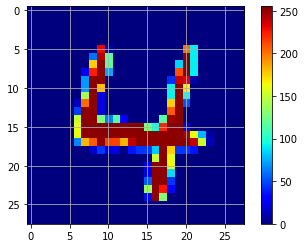

In [91]:
test_digit = test_row.values.reshape(28,28)
plt.imshow(test_digit, cmap="jet")
plt.grid()
plt.colorbar()

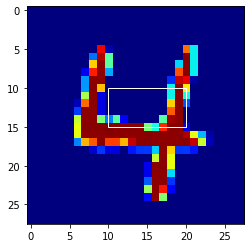

In [128]:
import matplotlib.patches as patches
fig, ax = plt.subplots()
ax.imshow(test_digit, cmap="jet")
rect = patches.Rectangle((10, 10), 10, 5, linewidth=1, edgecolor='w', facecolor='none')
ax.add_patch(rect)

In [92]:
img = test_digit
img.shape

(28, 28)

In [93]:
image = img.reshape(28, 28, 1)
shape = image.shape

In [94]:
zeros_h = np.zeros((shape[1], shape[2])).reshape(-1, shape[1], shape[2])
zeros_v = np.zeros((shape[0]+2, shape[2])).reshape(shape[0]+2, -1, shape[2])
padded_img = np.vstack((zeros_h, image, zeros_h)) # add rows
padded_img = np.hstack((zeros_v, padded_img, zeros_v)) # add cols

padded_img.shape

(30, 30, 1)

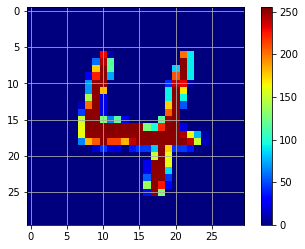

In [95]:
plt.imshow(padded_img.squeeze(axis=2), cmap="jet")
plt.grid()
plt.colorbar()

In [129]:
kshape = (3, 3)
stride = (1, 1)

rv = 0
cimg = []
for r in range(kshape[0], shape[0]+1, stride[0]):
    cv = 0
    for c in range(kshape[1], shape[1]+1, stride[1]):
        chunk = padded_img[rv:r, cv:c]
        soma = (np.multiply(chunk, np.random.randn(3, 3, 1)*0.1))
        summa = soma.sum() + np.random.uniform()
        cimg.append(summa)
        cv+=stride[1]
    row += 1
    rv+=stride[0]
cimg = np.array(cimg).reshape(int(rv/stride[0]), int(cv/stride[1]))

In [130]:
cimg.shape

(26, 26)

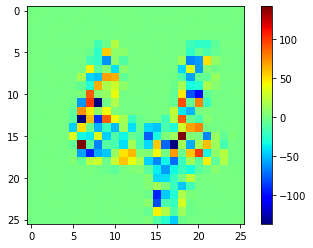

In [131]:
plt.imshow(cimg, cmap="jet")
plt.colorbar()